# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('ggplot')

import seaborn as sns

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

seed = np.random.seed(21)

# Loading Train and Test Data

In [2]:
data_train = pd.read_csv("train.csv")
display(data_train.shape, data_train.head())

(9557, 143)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
print(data_train.shape, data_train.head())

(9557, 143)              Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned

In [4]:
data_test = pd.read_csv("test.csv")
display(data_test.shape, data_test.head())

(23856, 142)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


# Inferences from the first view of data

## 142 features and 1 target

### Target / Target 분포 확인
- 1: Extreme Poverty
- 2: Moderate Poverty
- 3: Vulnerable Households
- 4: Non-vulnearable Households

### idhogar
가구

### Identify the output variable


# Understand the type of data

In [5]:
data_train_info = pd.DataFrame(columns=["Name of col", "Num of Null", "Dtype", "N_Unique"])

for i in range(0, len(data_train.columns)):
    data_train_info.loc[i] = [data_train.columns[i], 
                              data_train[data_train.columns[i]].isnull().sum(), 
                              data_train[data_train.columns[i]].dtypes, 
                              data_train[data_train.columns[i]].unique()]
data_train_info

,Name of col,Num of Null,Dtype,N_Unique
0,Id,0,object,"[ID_279628684, ID_f29eb3ddd, ID_68de51c94, ID_..."
1,v2a1,6860,float64,"[190000.0, 135000.0, nan, 180000.0, 130000.0, ..."
2,hacdor,0,int64,"[0, 1]"
3,rooms,0,int64,"[3, 4, 8, 5, 2, 1, 6, 7, 10, 9, 11]"
4,hacapo,0,int64,"[0, 1]"
...,...,...,...,...
138,SQBovercrowding,0,float64,"[1.0, 0.25, 1.7777778999999998, 16.0, 4.0, 9.0..."
139,SQBdependency,0,float64,"[0.0, 64.0, 1.0, 9.0, 0.25, 0.0625, 4.0, 0.444..."
140,SQBmeaned,5,float64,"[100.0, 144.0, 121.0, 529.0, 90.25, 289.0, 182..."
141,agesq,0,int64,"[1849, 4489, 8464, 289, 1369, 1444, 64, 49, 90..."


In [6]:
data_train.info # 내가 쓴거

<bound method DataFrame.info of                 Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0     ID_279628684  190000.0       0      3       0     1       1     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2     ID_68de51c94       NaN       0      8       0     1       1     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...            ...       ...     ...    ...     ...   ...     ...   ...   
9552  ID_d45ae367d   80000.0       0      6       0     1       1     0   
9553  ID_c94744e07   80000.0       0      6       0     1       1     0   
9554  ID_85fc658f8   80000.0       0      6       0     1       1     0   
9555  ID_ced540c61   80000.0       0      6       0     1       1     0   
9556  ID_a38c64491   80000.0       0      6       0     1       1     0   

      v18q1  r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedj

Column명 별로 data 특성 나타냄

### Check if there are any biases in dataset

In [49]:
# count of unique rows in target column
data_train["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

<AxesSubplot:>

Text(0.5, 0, 'Target Values')

Text(0, 0.5, 'Count of Households')

Text(0.5, 1.0, 'Target Column Spread')

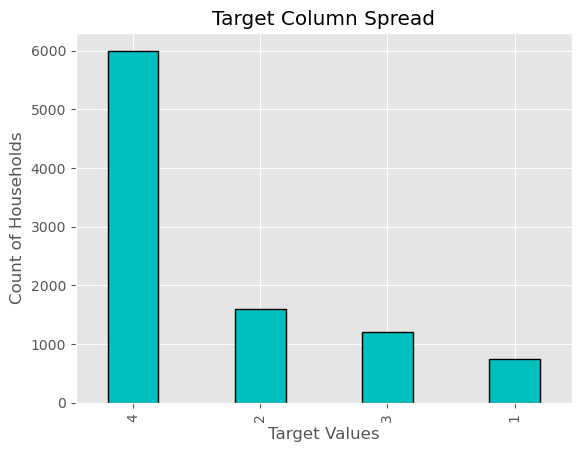

In [50]:
data_train["Target"].value_counts().plot.bar(width = 0.4, color='c', 
                                             edgecolor = 'k', linewidth = 1)
plt.xlabel("Target Values")
plt.ylabel("Count of Households")
plt.title("Target Column Spread")
plt.show()

Extreme poverty is the smallest count, hence the dataset is not biased

--> 왜??
4에 biased 된 것 아닌가..\
GPT에 따르면 심각한 imbalance는 아님.. 이라고 함


### Check whether all members of the house have the same poverty level

In [51]:
poverty_equal = data_train.groupby('idhogar')["Target"].apply(lambda X : X.nunique() == 1)
poverty_nequal = poverty_equal[poverty_equal != True]

idhogar 가구 단위로 그룹화해서 Target 값들이 모두 동일한지 확인\
같은 idhogar -> 같은 집에 사는 사람

nunique() = 1 이면 같은 값만 있다는 뜻

In [52]:
len(poverty_nequal)

85

There are 85 households where all the family members of the house do not have same poverty level\
85가구가 있음. 모든 가족 구성원의 빈곤 수준이 같지 않은

### Check if there is a house without a family head

In [7]:
household_head = data_train.groupby('idhogar')["parentesco1"].sum()
household_head

# parentesco1 -> 1은 가구의 대표자, 0은 가구 대표자가 아닌 구성원

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [54]:
household_without_head = data_train.loc[data_train["idhogar"].isin(household_head[household_head == 0].index), :]
household_without_head["idhogar"].nunique()

15

There are 15 houses without a Family Head\
-> head(대표자)가 없는 household가 15개 있다.\
Target 값을 학습하거나 예측할 때는 대표자가 있는 가구만을 신뢰할 수 있으므로\
대표자가 있는 가구만 집중적으로 다루자

### Set poverty level of the members and the head of the house within a family

In [55]:
household_without_head_equal = household_without_head.groupby('idhogar')["Target"].apply(lambda X : X.nunique() == 1)
sum(household_without_head_equal == False)

0

0 households without head have different PovertyLevel / Target Value

Hence, we need to focus on only the households with head for setting the poverty levels

In [56]:
for household in poverty_nequal.index:
    head_target = int(data_train[(data_train["idhogar"] == household) & (data_train["parentesco1"] == 1.0)] ["Target"])
    data_train.loc[data_train["idhogar"] == household, "Target"] = head_target

data_train

# 같은 가구인데 Target이 서로 다르면 대표자(head)의 Target으로 통일시키는 코드

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


같은 집에 사는 사람들은 같은 Target 값을 가져야 하고, 대표자(head)의 Target 값이 가장 신뢰 가능하기 때문에 대표자의 값으로 구성원 전체 Target을 통일

### Count how many null values are existing in columns

In [57]:
data_train_info = pd.DataFrame(columns=["Name of Col", "Num of Null", "Dtype", "N_Unique"])

for i in range(0, len(data_train.columns)):
    data_train_info.loc[i] = [data_train.columns[i],
                             data_train[data_train.columns[i]].isnull().sum(),
                             data_train[data_train.columns[i]].dtypes,
                             data_train[data_train.columns[i]].nunique()]
    
data_train_info

,Name of Col,Num of Null,Dtype,N_Unique
0,Id,0,object,9557
1,v2a1,6860,float64,157
2,hacdor,0,int64,2
3,rooms,0,int64,11
4,hacapo,0,int64,2
...,...,...,...,...
138,SQBovercrowding,0,float64,38
139,SQBdependency,0,float64,31
140,SQBmeaned,5,float64,155
141,agesq,0,int64,97


In [58]:
# Null 값이 있는 col 추출

data_train_info[data_train_info["Num of Null"]>0]

,Name of Col,Num of Null,Dtype,N_Unique
1,v2a1,6860,float64,157
8,v18q1,7342,float64,6
21,rez_esc,7928,float64,6
103,meaneduc,5,float64,155
140,SQBmeaned,5,float64,155


In [59]:
data_train_info["Num of Null"].sum()

22140

Looking at different datatypes and null values

1. No Null values for integer datatype features.
2. No Null values for object datatype features.
3. For float64 datatype below features has Null values
- v2al - 6860 values
- v18q1 - 7342 values
- rez_esc - 7928 values
- meaneduc - 5 values
- SQBmeaned - 5 values

4. Total 22140 Null values in the train dataset.


### Remove null value rows of the target variable. / 대표자 없는 가구 제거

In [8]:
data_train[data_train["Target"]==0]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


No Null values in Target variable.

## Data Cleaning
### Treating Mixed Values

In [61]:
data_train.loc[:, ["dependency", "edjefe", "edjefa"]].head()

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no


- dependency : 부양 비율
- edjefe : 각 가구의 남자 대표
- edjefa : 각 가구의 여자 대표
> yes, no, 숫자 등 여러 값이 들어가있음\
yes : 교육 받았음\
no : 교육 받지 않음\
숫자 : 교육 연수

In [62]:
# yes와 no를 숫자로 바꾸는 작업

mapping = {"yes" :1, "no" :0}

for data in [data_train, data_test]:
    data["dependency"] = data["dependency"].replace(mapping).astype(float)
    data['edjefe'] = data['edjefe'].replace(mapping).astype(float)
    data['edjefa'] = data['edjefa'].replace(mapping).astype(float)
    
data_train.loc[:, ["dependency", "edjefe", "edjefa"]].head()

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


As identified in cell 13, below listed features have NaN values
- v2a1 - Monthly rent payment - 6860 values
- v18q1 - number of tablets household owns - 7642 values
- rez_esc - Years behind in school - 7928 values
- meaneduc - average years of education for adults (18+) - 5 values
- SQBmeaned - square of the mean years of education of adults (>= 18) in the household - 5 values

------

Lets fix v2a1 feature first. Features related to v2a1 (monthly rent payment)

tipovivi1, =1 own and fully paid house (집을 완전히 소유함)\
tipovivi2, =1 own, paying in installments (집을 대출 중임)\
tipovivi3, =1 rented (월세로 거주)\
tipovivi4, =1 precarious (무상으로 거주 ex. 친척집, 정부 제공 ..)\
tipovivi5, =1 other(assigned, borrowed) (기타)

In [63]:
data = data_train[data_train["v2a1"].isnull()].head()
data.loc[:, ["v2a1", "tipovivi1", "tipovivi2", "tipovivi3", "tipovivi4", "tipovivi5"]]

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,NaN,1,0,0,0,0
13,NaN,1,0,0,0,0
14,NaN,1,0,0,0,0
26,NaN,1,0,0,0,0
32,NaN,1,0,0,0,0


<AxesSubplot:>

([<matplotlib.axis.XTick at 0x129e3f57730>,
 [Text(0, 0, 'Owns and Paid Off'),
  Text(1, 0, 'Owns and Paying'),
  Text(2, 0, 'Rented'),
  Text(3, 0, 'Precarious'),
  Text(4, 0, 'Other')])

Text(0.5, 1.0, 'Home-ownership status for Households Missing Rent Payments')

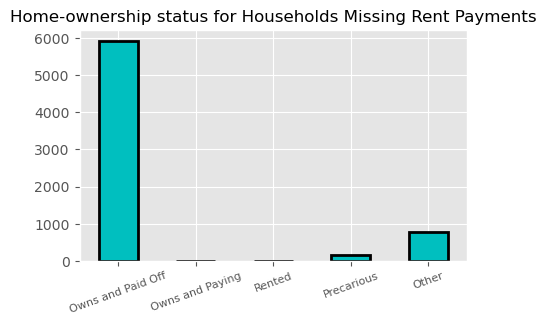

In [64]:
# Features indicating home-ownership
own_feature = [x for x in data_train if x.startswith('tipo')]

# Plotting the home-ownership feqtures for NaN v2a1 rows
data_train.loc[data_train["v2a1"].isnull(), own_feature].sum().plot.bar(figsize = (5,3), color = 'c', edgecolor = "black", linewidth=2)

plt.xticks([0,1,2,3,4], ["Owns and Paid Off", "Owns and Paying", "Rented", "Precarious", "Other"], rotation=20, size=8)
plt.title("Home-ownership status for Households Missing Rent Payments", size=12)

### 결측치 처리

From the above counts we infer that, if the house is owned and paid off,\
then the house rent should be 0. Lets add 0 for all the NaN values.\

집이 완전히 소유된 경우(tipovivi1 == 1), 월세는 당연히 0 이어야 함.\
v2a1 값이 NaN이어도 그냥 0으로 채우자

In [65]:
for data in [data_train, data_test]:
    data["v2a1"].fillna(value=0, inplace=True)

data_train[["v2a1"]].isnull().sum()

v2a1    0
dtype: int64

lets fix v18q1 - number of tablets household owns.(가구내 보유한 태블릿 갯수)

Lets analyse few rows with v18q1 feature as NaN, to understand the related features.\
Since this is an household level feature, therefore we consider the rows for head of the household.

In [66]:
data_train.loc[data_train["parentesco1"]==1, ["v18q", "v18q1"]].head()

,v18q,v18q1
0,0,NaN
1,1,1.0
2,0,NaN
5,1,1.0
8,0,NaN


In [67]:
data_train.groupby(by='v18q1')["v18q1"].count()

v18q1
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

Looking at above data, when owns a tablet column is 0, then there will be no number of tablets owned by household.

So, lets add 0 for all the NaN values.

In [68]:
for df in [data_train, data_test]:
    df["v18q1"].fillna(value=0, inplace=True)

data_train["v18q1"].isnull().sum()

0

Now lets treat rez_esc(Years behind in school)\
feature - 7928 NaN values

In [69]:
# Checking related features of rez_sec when the value is not Null
data_train[data_train["rez_esc"].notnull()]["age"].describe()

# rez_esc -> 학생의 교육 결손 정도. 학생이 학교에 가지 못한 평균 연수

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

Years behind in school has some value for age value between 7 and 17 years.\
Lets check if there are any NaN values in 7 to 17 years of age.

In [70]:
data_train[data_train["rez_esc"].isna() & ((data_train["age"]>7)&(data_train["age"] < 17))]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


Only one value as NaN in age group 7 to 17 years.\
Hence, now we can fill the NaN values with 0.

In [71]:
for data in [data_train, data_test]:
    data["rez_esc"].fillna(value = 0, inplace = True)

data_train["rez_esc"].isnull().sum()

0

meaneduc -> average years of education for adults(18+) (가구 구성원들의 평균 교육 연수)\
해당 가구에 속한 모든 구성원의 교육 수준을 평균낸 값

Related features
- edjefe
- edfefa
- instlevel1
- instlevel2

edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0\
edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0\
instlevel1, =1 no level of education\
instlevel2, =1 incomplete primary

In [72]:
# find NaN in features which is related to meaneduc

data_train[data_train["meaneduc"].isnull()].loc[:, ["age", "meaneduc", 
                                                    "edjefe", "edjefa", "instlevel1",
                                                   "instlevel2", "instlevel3", "instlevel4",
                                                   "instlevel5", "instlevel6", "instlevel7",
                                                   "instlevel8", "instlevel9"]]

,age,meaneduc,edjefe,edjefa,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
1291,18,NaN,0.0,10.0,0,0,0,1,0,0,0,0,0
1840,18,NaN,4.0,0.0,0,0,1,0,0,0,0,0,0
1841,18,NaN,4.0,0.0,0,1,0,0,0,0,0,0,0
2049,19,NaN,12.0,0.0,0,0,0,0,0,0,1,0,0
2050,19,NaN,12.0,0.0,0,0,0,0,0,0,1,0,0


In [73]:
# find not NaN

data_train.loc[:,['Id','meaneduc','edjefe','edjefa','instlevel1','instlevel2','instlevel3',
                  'instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9']].head()

,Id,meaneduc,edjefe,edjefa,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,ID_279628684,10.0,10.0,0.0,0,0,0,1,0,0,0,0,0
1,ID_f29eb3ddd,12.0,12.0,0.0,0,0,0,0,0,0,0,1,0
2,ID_68de51c94,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0
3,ID_d671db89c,11.0,11.0,0.0,0,0,0,1,0,0,0,0,0
4,ID_d56d6f5f5,11.0,11.0,0.0,0,0,0,0,1,0,0,0,0


From above outputs, there are five datapoints with meaneduc as NaN.\
And all have 18+ age. The value of meaneduc feature is same as 'edjefe', 'edjefa'\

Hence, we treat the 5 NaN values in similar way.

In [74]:
for data in [data_train, data_test]:
    data["meaneduc"].fillna(value = data['edjefe'], inplace=True)

data_train["meaneduc"].isnull().sum()

0

SQBmeaned - square of the mean years of education of adults(>=18) (meaneduc의 제곱값)\

Understand the dependent features to analyze why the 5 values are NaN.

In [75]:
data_train[data_train["SQBmeaned"].isnull()].loc[:, ["SQBmeaned", "meaneduc", 
                                                     "edjefe", "edjefa", "instlevel1",
                                                    "instlevel2"]]

,SQBmeaned,meaneduc,edjefe,edjefa,instlevel1,instlevel2
1291,NaN,0.0,0.0,10.0,0,0
1840,NaN,4.0,4.0,0.0,0,0
1841,NaN,4.0,4.0,0.0,0,1
2049,NaN,12.0,12.0,0.0,0,0
2050,NaN,12.0,12.0,0.0,0,0


In [76]:
data_train.loc[:, ["SQBmeaned", "meaneduc", "edjefe", "edjefa", "instlevel1", "instlevel2"]].head()

,SQBmeaned,meaneduc,edjefe,edjefa,instlevel1,instlevel2
0,100.0,10.0,10.0,0.0,0,0
1,144.0,12.0,12.0,0.0,0,0
2,121.0,11.0,0.0,11.0,0,0
3,121.0,11.0,11.0,0.0,0,0
4,121.0,11.0,11.0,0.0,0,0


As per SQBmeaned description and above outputs, is appears that SQBmeaned is square of the meaneduc.\
Hence, treating the NaN accordingly.

In [77]:
for data in [data_train, data_test]:
    data["SQBmeaned"].fillna(value = data["meaneduc"]**2, inplace=True)

data_train["SQBmeaned"].isnull().sum()

0

There are some squared variables and we understand that these would not add any value to the classification model.\

Hence dropping these features - \
SQBescolari, SQBhogar, SQBedjefe, SQBhogar_nin, SQBovercrowding, SQBdependency, SQBmeaned, agesq.

### 상관관계 분석

In [78]:
# dropping squared features

cols = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 
        'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

for df in [data_train, data_test]:
    df.drop(columns=cols, inplace=True)

print(data_train.shape, data_test.shape)

(9557, 134) (23856, 133)


In [81]:
# checking for the household redundant variables

heads = data_train.loc[data_train["parentesco1"]==1, :]
heads.shape

(2973, 134)

In [82]:
corr_matrix = heads.corr()
corr_matrix

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.000000,-0.022945,0.096752,-0.021961,0.024083,0.045291,0.179476,0.202622,0.025942,-0.029886,...,0.168408,-0.039600,-0.023930,-0.077042,-0.090304,-0.067789,0.141330,-0.141330,-0.205431,0.166112
hacdor,-0.022945,1.000000,-0.181283,0.624324,-0.143713,-0.055073,-0.061309,-0.056616,0.186709,0.057368,...,-0.029605,0.010581,0.026791,-0.010283,0.025574,0.001103,0.025404,-0.025404,-0.090660,-0.136275
rooms,0.096752,-0.181283,1.000000,-0.172382,0.136410,0.158394,0.263738,0.271945,-0.039824,0.232702,...,0.210526,-0.069091,-0.132380,-0.028103,-0.097762,-0.055276,0.126715,-0.126715,0.189562,0.201019
hacapo,-0.021961,0.624324,-0.172382,1.000000,-0.154749,-0.062110,-0.051432,-0.045953,0.174432,0.088729,...,-0.032999,0.018682,0.007766,0.000237,0.007112,0.025496,0.015219,-0.015219,-0.053421,-0.096313
v14a,0.024083,-0.143713,0.136410,-0.154749,1.000000,0.192954,0.029549,0.027883,-0.036434,0.019440,...,0.018571,-0.007181,-0.015806,0.006585,-0.021979,0.005262,-0.018117,0.018117,0.031887,0.068230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lugar6,-0.067789,0.001103,-0.055276,0.025496,0.005262,-0.053853,-0.081023,-0.080580,0.037855,0.030872,...,-0.348073,-0.091332,-0.076929,-0.086971,-0.092448,1.000000,-0.247387,0.247387,-0.036605,-0.047958
area1,0.141330,0.025404,0.126715,0.015219,-0.018117,0.066396,0.167636,0.157366,-0.034287,-0.043043,...,0.375230,-0.102796,-0.009893,-0.184287,-0.123131,-0.247387,1.000000,-1.000000,0.046851,0.089509
area2,-0.141330,-0.025404,-0.126715,-0.015219,0.018117,-0.066396,-0.167636,-0.157366,0.034287,0.043043,...,-0.375230,0.102796,0.009893,0.184287,0.123131,0.247387,-1.000000,1.000000,-0.046851,-0.089509
age,-0.205431,-0.090660,0.189562,-0.053421,0.031887,0.038315,-0.082681,-0.076773,-0.292030,0.048152,...,0.088904,0.004921,-0.046924,-0.025493,-0.057551,-0.036605,0.046851,-0.046851,1.000000,0.026581


<Figure size 1200x1000 with 0 Axes>

<AxesSubplot:>

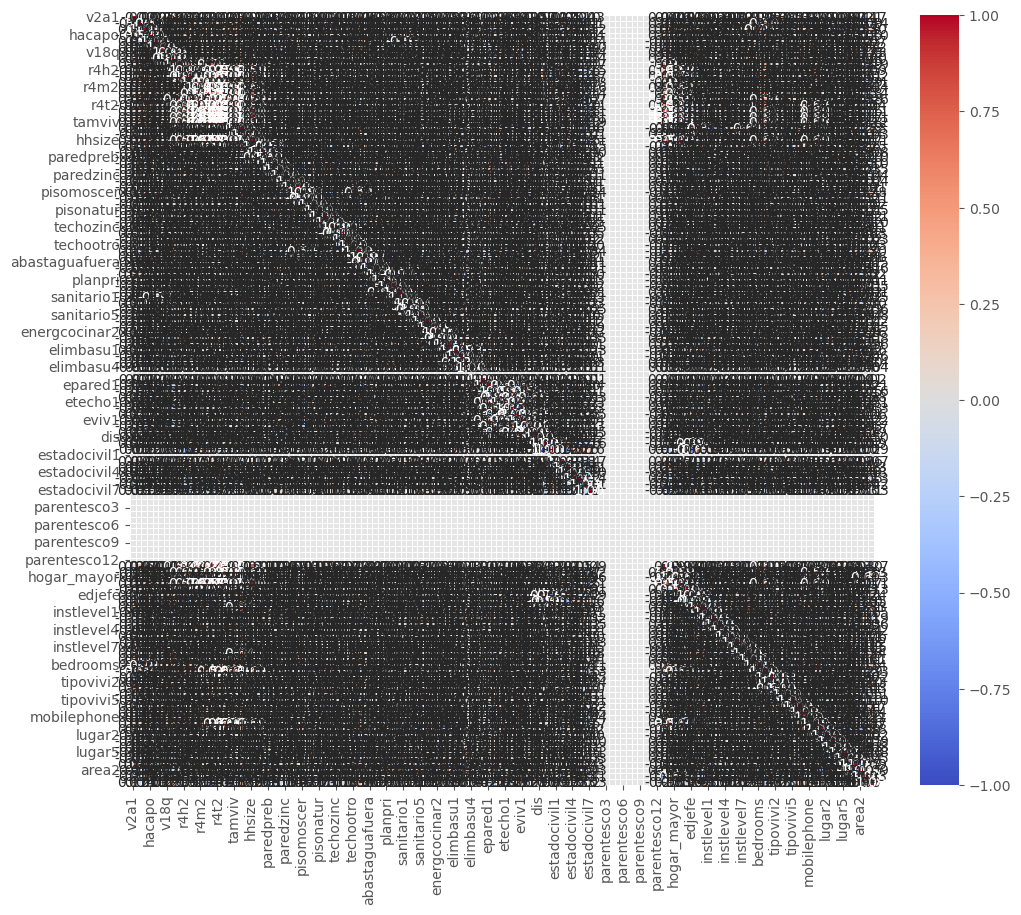

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.show()

변수가 너무 많아서 ㅋ ㅋ ㅋ 시각화 불가능 ㅠ

In [87]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,NaN,-0.022945,0.096752,-0.021961,0.024083,0.045291,0.179476,0.202622,0.025942,-0.029886,...,0.168408,-0.039600,-0.023930,-0.077042,-0.090304,-0.067789,0.141330,-0.141330,-0.205431,0.166112
hacdor,NaN,NaN,-0.181283,0.624324,-0.143713,-0.055073,-0.061309,-0.056616,0.186709,0.057368,...,-0.029605,0.010581,0.026791,-0.010283,0.025574,0.001103,0.025404,-0.025404,-0.090660,-0.136275
rooms,NaN,NaN,NaN,-0.172382,0.136410,0.158394,0.263738,0.271945,-0.039824,0.232702,...,0.210526,-0.069091,-0.132380,-0.028103,-0.097762,-0.055276,0.126715,-0.126715,0.189562,0.201019
hacapo,NaN,NaN,NaN,NaN,-0.154749,-0.062110,-0.051432,-0.045953,0.174432,0.088729,...,-0.032999,0.018682,0.007766,0.000237,0.007112,0.025496,0.015219,-0.015219,-0.053421,-0.096313
v14a,NaN,NaN,NaN,NaN,NaN,0.192954,0.029549,0.027883,-0.036434,0.019440,...,0.018571,-0.007181,-0.015806,0.006585,-0.021979,0.005262,-0.018117,0.018117,0.031887,0.068230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lugar6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.247387,0.247387,-0.036605,-0.047958
area1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,0.046851,0.089509
area2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046851,-0.089509
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026581


상관관계 행렬에서 상삼각 부분만 추출해서 중복 제거\
-> 대칭행렬이기 때문에 중복되는 부분을 제거

np.triu(np.ones(corr_matrix.shape)\
np.ones -> 1로 채운 행렬 생성\
np.triu ... k=1 -> 상삼각행렬에서 대각선 위 요소만 1, 나머지는 0

astype(bool) -> 1과 0으로 된 행렬을 T / F 으로 바꿈

where -> 상삼각 부분만 남기고 NaN으로 처리

In [89]:
# 상관관계 0.95 이상인 컬럼 찾기

cols_to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

cols_to_drop

['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'area2']

중복 방지 & 다중공선성 해결을 위해 0.95 이상의 상관관계를 갖는 변수 제거

In [90]:
# cols_to_drop 드롭하기
for df in [data_train, data_test]:
    df.drop(columns=cols_to_drop, inplace=True)

# remove male
for df in [data_train, data_test]:
    df.drop(columns = 'male', inplace=True)

# drop ID and idhogar
cols = ["Id", "idhogar"]
for df in [data_train, data_test]:
    df.drop(columns=cols, inplace=True)

print(data_train.shape, data_test.shape)

(9557, 125) (23856, 124)


### Predict the accuracy using random forest classifier

In [91]:
X = data_train.drop("Target", axis=1)
y = data_train["Target"]

print(X.shape, y.shape)

(9557, 124) (9557,)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc_model = RandomForestClassifier(n_estimators=150)
rfc_model.fit(X_train, y_train)

y_pred_test = rfc_model.predict(X_test)

RandomForestClassifier(n_estimators=150)

In [93]:
print("Accuracy score of RFC model on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy score of RFC model on test dataset is : 
0.9612970711297071
[[ 60   2   0   7]
 [  2 142   0   8]
 [  0   0 109  16]
 [  0   0   2 608]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.92        69
           2       0.99      0.93      0.96       152
           3       0.98      0.87      0.92       125
           4       0.95      1.00      0.97       610

    accuracy                           0.96       956
   macro avg       0.97      0.92      0.94       956
weighted avg       0.96      0.96      0.96       956



- Precision : False Positive를 얼마나 줄였는가? // 예측한 것 중에 맞은 비율(정밀도)
- Recall : Fasle Negative를 얼마나 줄였는가? // 실제로 맞는 것 중에 잘 맞춘 비율(재현율)
- f1 score : 두 성능의 균형을 본 지표 // precision과 recall의 조화평균
- support : 각 클래스의 실제 데이터 개수

### Checking the accuracy using random forest with cross validation

In [95]:
kfold = KFold(n_splits=4, random_state=seed, shuffle=True)
print(cross_val_score(rfc_model, X, y, cv=kfold, scoring="accuracy"))

[0.93849372 0.94390959 0.9464211  0.94181666]


In [96]:
#Mean of cross_val_score

print(cross_val_score(rfc_model, X, y, cv=kfold, scoring='accuracy').mean())

0.9392059316497685


### Checking for the important and impactful features

In [98]:
feature_labels = list(X)
feature_importance = pd.DataFrame({"Feature" : feature_labels, 
                                   "Importance" : rfc_model.feature_importances_})

feature_importance[feature_importance["Importance"]>0.025]

,Feature,Importance
2,rooms,0.026007
89,hogar_nin,0.032077
92,dependency,0.044786
93,edjefe,0.031589
95,meaneduc,0.071796
106,overcrowding,0.036035
115,qmobilephone,0.029486


Feature importance -> 모델이 예측을 할 때 특정 변수가 얼마나 영향을 끼쳤는지를 수치로 표현한 것

값이 클수록 feature가 예측에 큰 역할을 함



- rooms : 가구 내 방의 수
- hogar_nin : 가구 내 미성년자 수
- dependency : 부양 비율 (일 못하는 사람 / 일 할 수 있는 사람)
- edjefe : 남자 대표자의 교육 연수
- meaneduc : 가구 평균 교육 연수
- overcrowding : 1인당 방 수
- qmobilephone  : 휴대폰 보유 여부

등이 높은 feature